In [75]:
#!pip install tensorflow
!pip install keras
import PIL
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)
import time
from IPython import display
%matplotlib inline

In [77]:
#take random noise as input and a starting shape that has dimensions ((7,14,28), (7,14,28), (128, 256, 512)
print(tf.__version__)
def make_generator_model(): 
    model = tf.keras.Sequential() 
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,))) 
    #model.add(layers.normalization.BatchNormalization()) 
    model.add(layers.LeakyReLU()) 
    model.add(layers.Reshape((7, 7, 256))) 
    #assert model.output_shape == (None, 7, 7, 256) 
    # Note: None is the batch size 
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)) 
    #assert model.output_shape == (None, 7, 7, 128)
    #model.add(layers.BatchNormalization()) 
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    #assert model.output_shape == (None, 14, 14, 64) 
    #model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU()) 

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(4, 4), padding='same', use_bias=False))
    #assert model.output_shape == (None, 56, 56, 1) 
    #model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU()) 

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(4, 4), padding='same', use_bias=False, activation='tanh')) 
    #assert model.output_shape == (None, 224, 224, 1)
    #print(model.output_shape)

    return model


2.10.0


In [78]:
generator = make_generator_model()
noise = tf.random.normal([1, 100]) #replace 1 with batch size
generated_image = generator(noise, training=False)

(224, 224, 3)


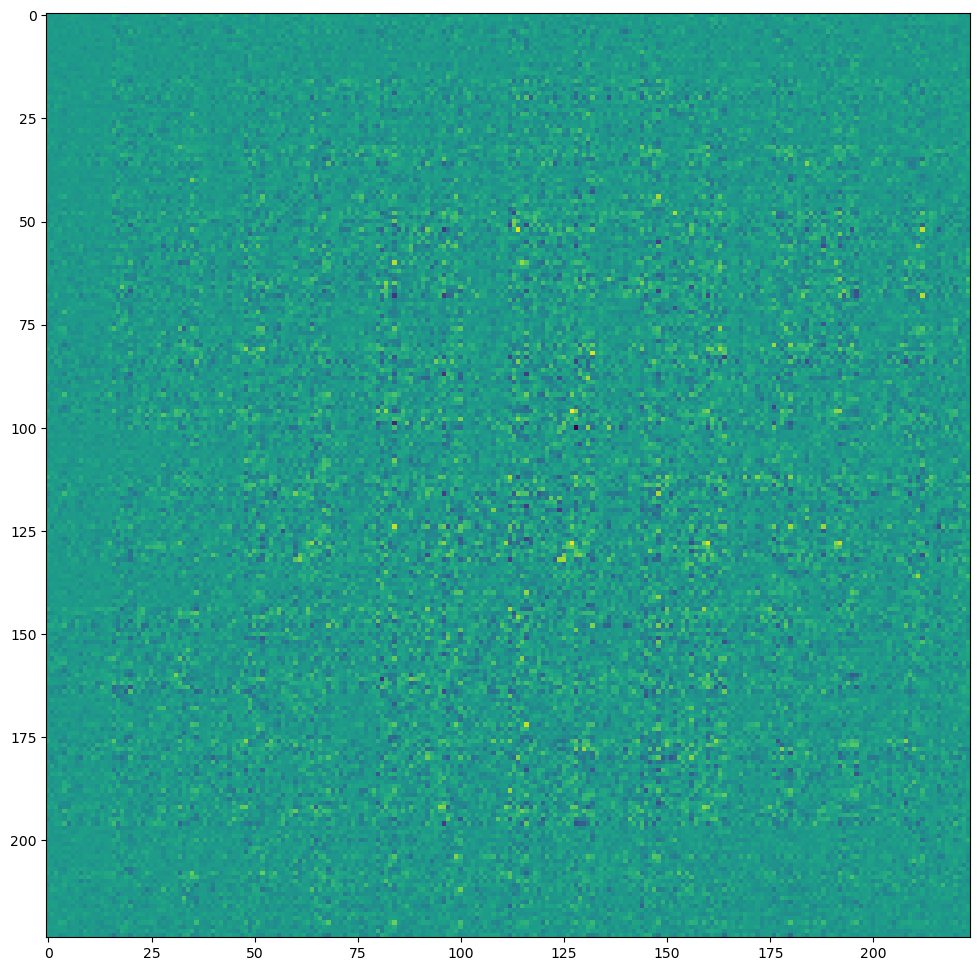

In [80]:
plt.figure(figsize=(12,12))
print(generated_image[0, :, :, :].shape) #check that image has scaled to correct size
plt.imshow(generated_image[0, :, :, 0])
#plt.imshow(generated_image[0, :, :, 3])
plt.show()